In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df=pd.read_excel("Book1.xlsx")

In [34]:
df.head()

,Amount_of_Algae,Initial_Concentration,Absorbance,PPM,Contact_time,PH,Removal Effeciency
0,0.5,1000,0.48,865.459118,30,4,0.134541
1,1.0,1000,0.42,739.450043,30,4,0.260550
2,2.0,1000,0.40,697.447018,30,4,0.302553
3,3.0,1000,0.37,634.442480,30,4,0.365558
4,4.0,1000,0.32,529.434918,30,4,0.470565


In [39]:
df.corr()


,Amount_of_Algae,Initial_Concentration,Absorbance,PPM,Contact_time,PH,Removal Effeciency
Amount_of_Algae,1.000000e+00,2.482566e-16,-0.397296,-0.397490,-9.535994e-17,-6.049624e-17,0.722119
Initial_Concentration,2.482566e-16,1.000000e+00,0.847040,0.846818,4.473894e-17,-4.392901e-16,-0.366453
Absorbance,-3.972962e-01,8.470401e-01,1.000000,0.999994,-1.953207e-01,3.876443e-02,-0.742727
PPM,-3.974898e-01,8.468177e-01,0.999994,1.000000,-1.958065e-01,3.851217e-02,-0.742954
Contact_time,-9.535994e-17,4.473894e-17,-0.195321,-0.195806,1.000000e+00,2.990923e-16,0.358877
PH,-6.049624e-17,-4.392901e-16,0.038764,0.038512,2.990923e-16,1.000000e+00,0.100913
Removal Effeciency,7.221190e-01,-3.664528e-01,-0.742727,-0.742954,3.588767e-01,1.009134e-01,1.000000


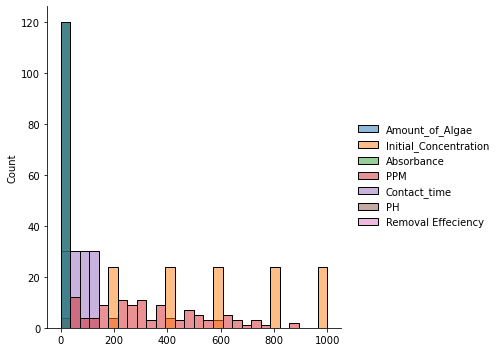

In [40]:
import seaborn as sns
sns.displot(df)

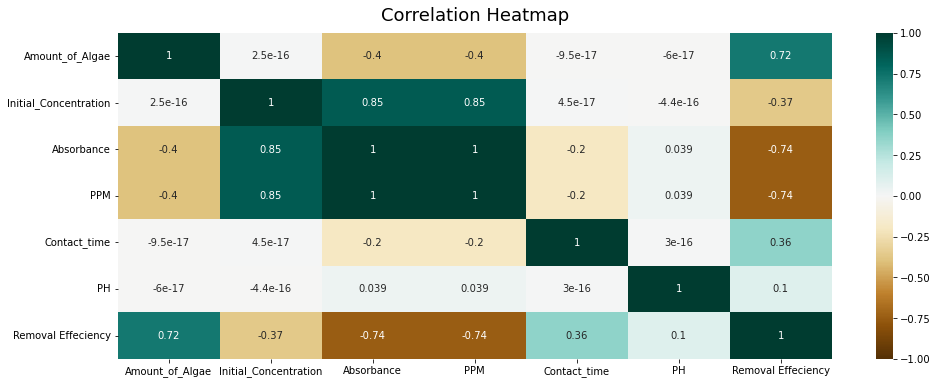

In [42]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [43]:
df.describe()

,Amount_of_Algae,Initial_Concentration,Absorbance,PPM,Contact_time,PH,Removal Effeciency
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.583333,600.000000,0.223850,327.438681,75.000000,3.600000,0.486486
std,1.598757,284.028641,0.099059,207.981286,33.681653,0.491952,0.187282
min,0.500000,200.000000,0.078000,21.198316,30.000000,3.000000,0.101939
25%,1.000000,400.000000,0.150000,172.409206,52.500000,3.000000,0.356214
50%,2.500000,600.000000,0.210000,298.418281,75.000000,4.000000,0.467634
75%,4.000000,800.000000,0.290000,466.430381,97.500000,4.000000,0.622855
max,5.000000,1000.000000,0.480000,865.459118,120.000000,4.000000,0.894008


In [45]:
x=df.iloc[:,:6]
y=df.iloc[:,6]

In [46]:
x

,Amount_of_Algae,Initial_Concentration,Absorbance,PPM,Contact_time,PH
0,0.5,1000,0.480,865.459118,30,4
1,1.0,1000,0.420,739.450043,30,4
2,2.0,1000,0.400,697.447018,30,4
3,3.0,1000,0.370,634.442480,30,4
4,4.0,1000,0.320,529.434918,30,4
...,...,...,...,...,...,...
115,1.0,200,0.100,67.401644,120,4
116,2.0,200,0.090,46.400131,120,4
117,3.0,200,0.089,44.299980,120,4
118,4.0,200,0.085,35.899375,120,4


In [48]:
y

0      0.134541
1      0.260550
2      0.302553
3      0.365558
4      0.470565
         ...   
115    0.662992
116    0.767999
117    0.778500
118    0.820503
119    0.873007
Name: Removal Effeciency, Length: 120, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [50]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [51]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

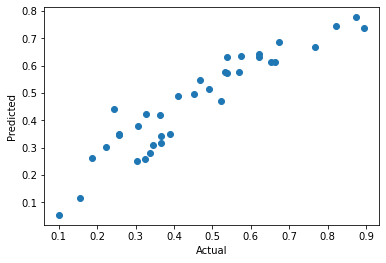

In [67]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [58]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [59]:
pred_df

,Actual Value,Predicted Value,Difference
48,0.187614,0.261543,-0.073929
94,0.621481,0.631283,-0.009802
95,0.673985,0.684896,-0.010911
8,0.344556,0.310930,0.033626
97,0.452977,0.495905,-0.042928
22,0.575573,0.636109,-0.060536
7,0.323554,0.257316,0.066238
10,0.491567,0.514649,-0.023083
45,0.653229,0.611349,0.041881
89,0.621481,0.643465,-0.021984


In [61]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (84, 6)
X_test: (36, 6)
Y_train: (84,)
Y_test: (36,)


#To train the model, we have to import the Linear Regression model, which we have already created at the beginning. Use the fit method, and pass the training sets into it to train the model.

In [63]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)i

 Accuracy of the model is 86.57


# ACCURACY OF LINEAR REGRESSION MODEL IS 86.57